In [ ]:
!pip install ultralytics
!pip install roboflow

In [26]:
from ultralytics import YOLO
from IPython.display import Image, display , Video
import pandas as pd
import os
from PIL import Image as PILImage
from IPython.display import Image, display

In [9]:
from roboflow import Roboflow
rf = Roboflow(api_key="YXNyq2K17rYfZXkWXTqv")
project = rf.workspace("peng-majiz").project("fruit-b2sy0")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fruit-2 in yolov8:: 100%|██████████| 626/626 [00:00<00:00, 8524.90it/s]


In [11]:
folder = '/content/fruit-2'
print(os.listdir(folder))

['test', 'data.yaml', 'README.dataset.txt', 'valid', 'train', 'README.roboflow.txt']


In [ ]:
model = YOLO("yolov8m.pt")
model.train(
    data = '/content/fruit-2/data.yaml' ,
    imgsz = 640 ,
    batch = 16 ,
    epochs = 80 ,
)

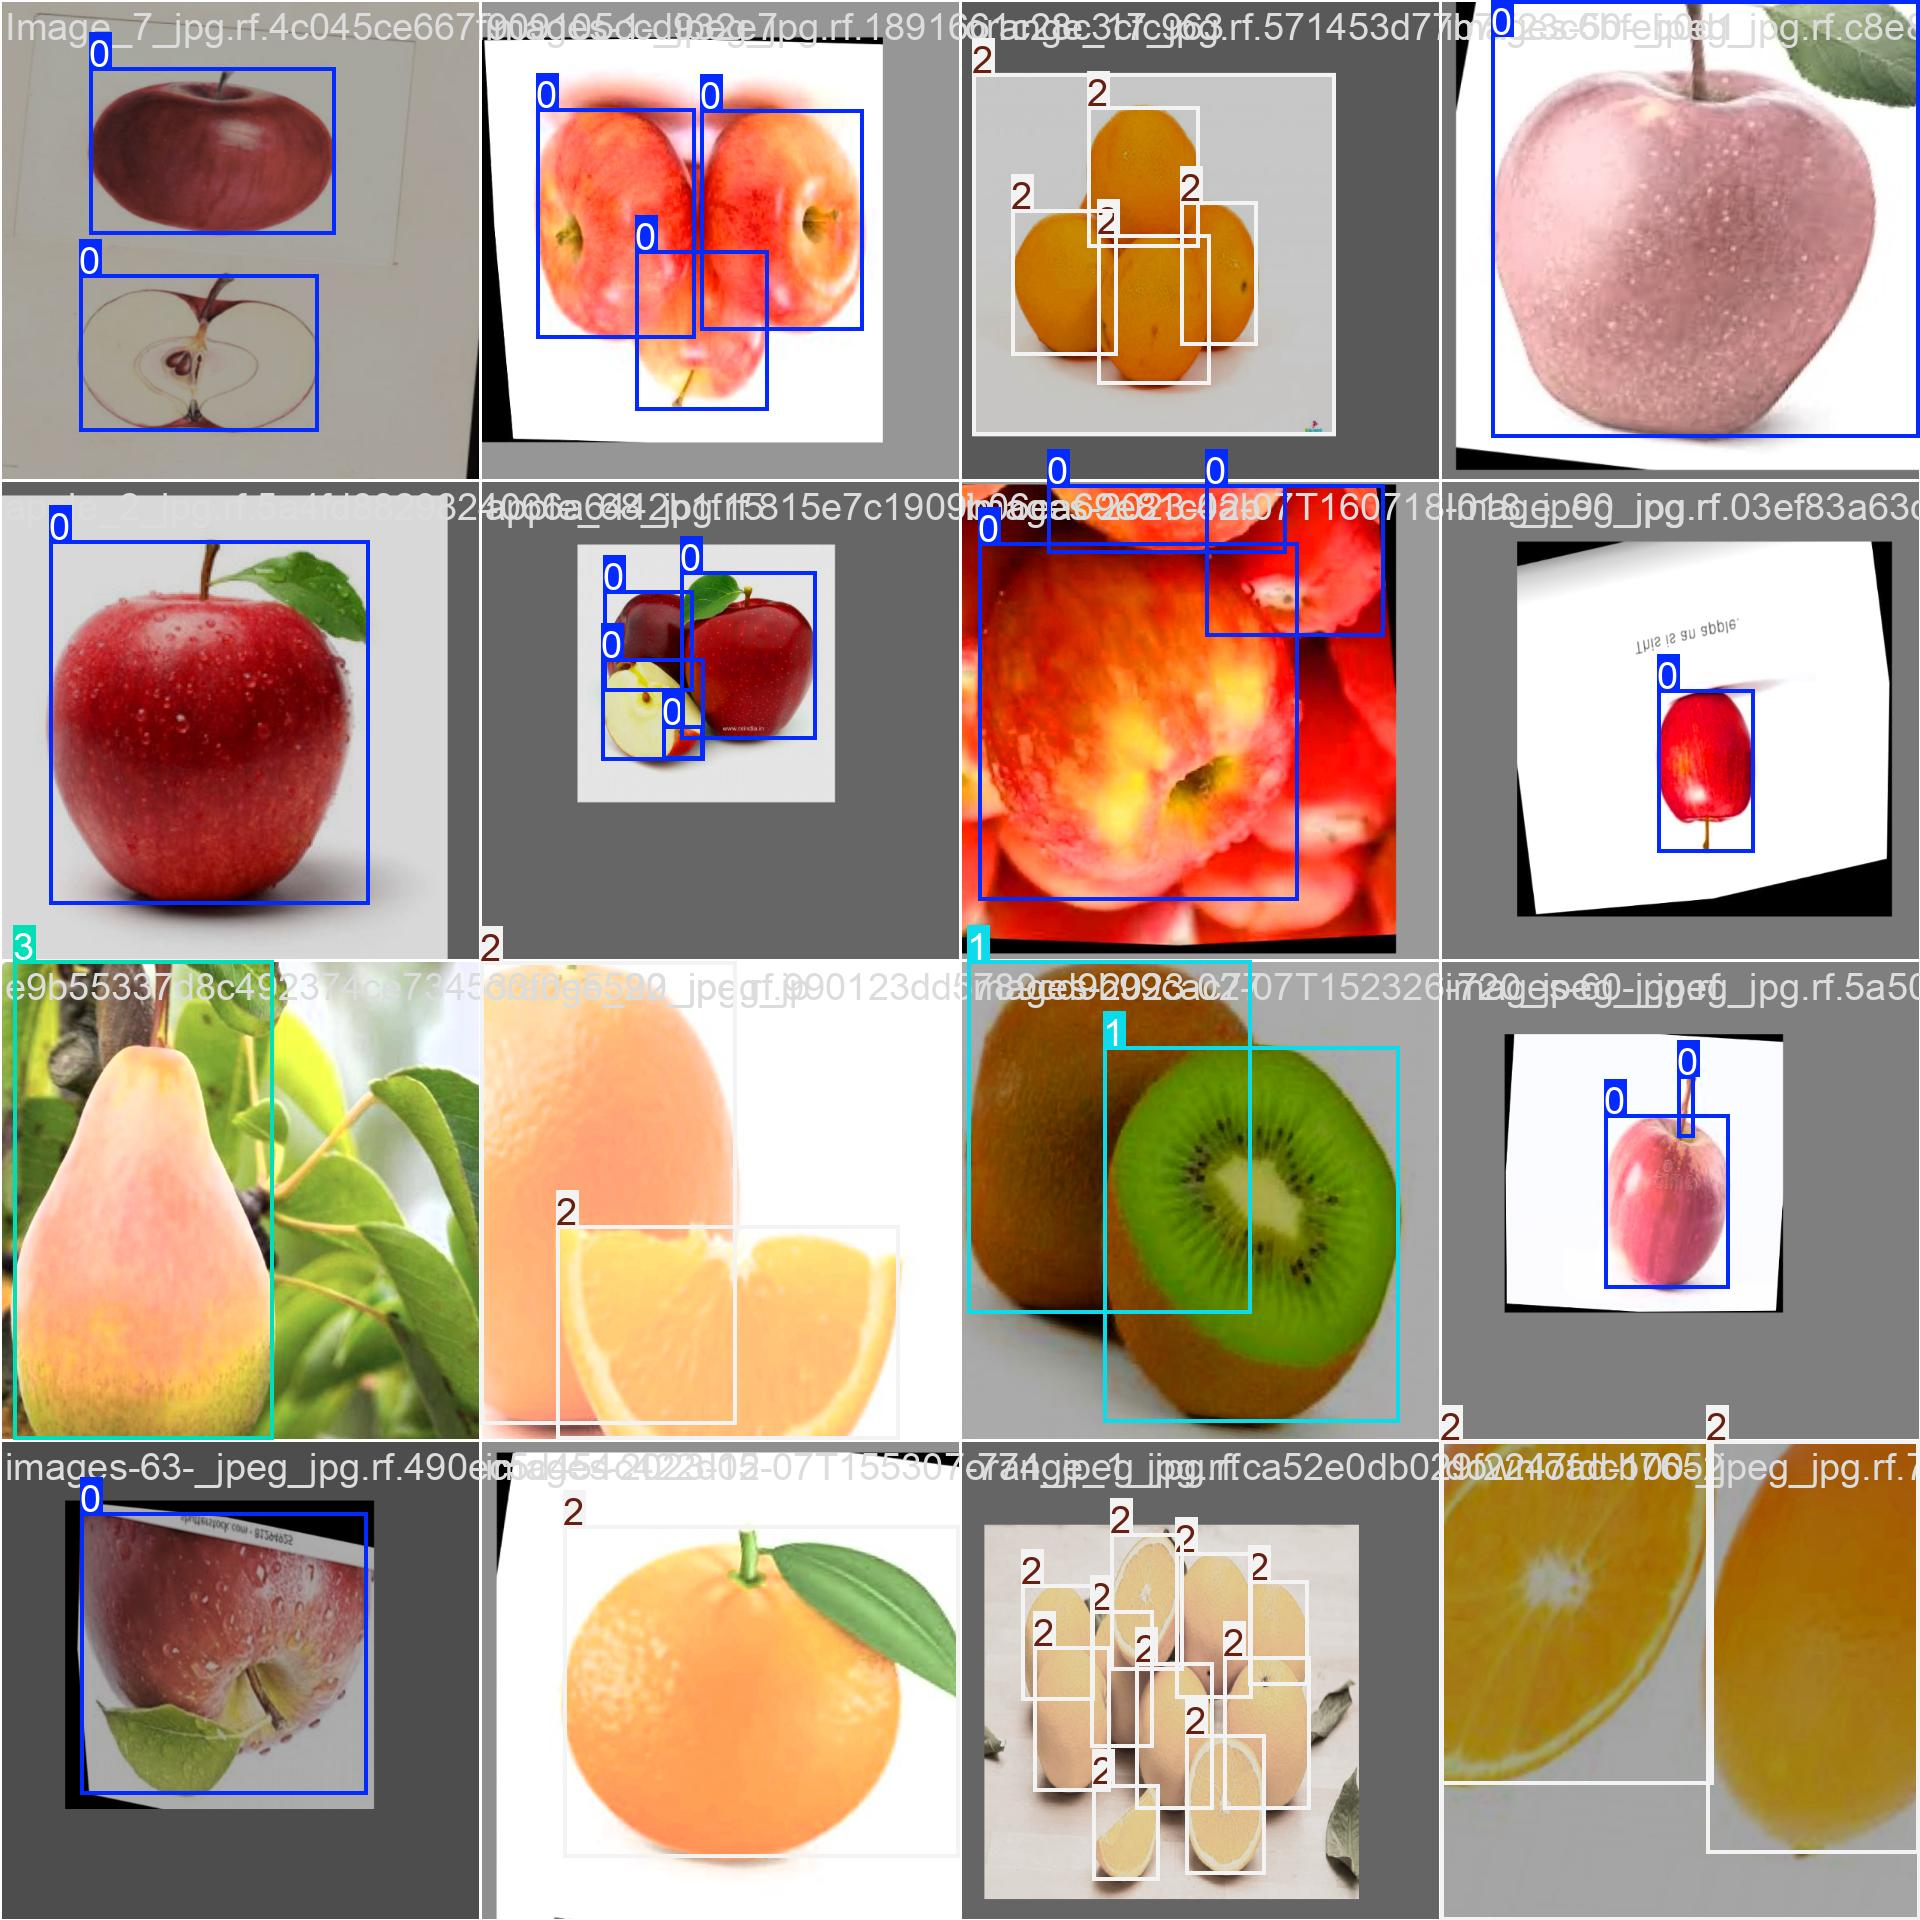

In [71]:
val_batch = '/content/runs/detect/train/train_batch1052.jpg'
display(Image(filename = val_batch, width=1500, height=550))

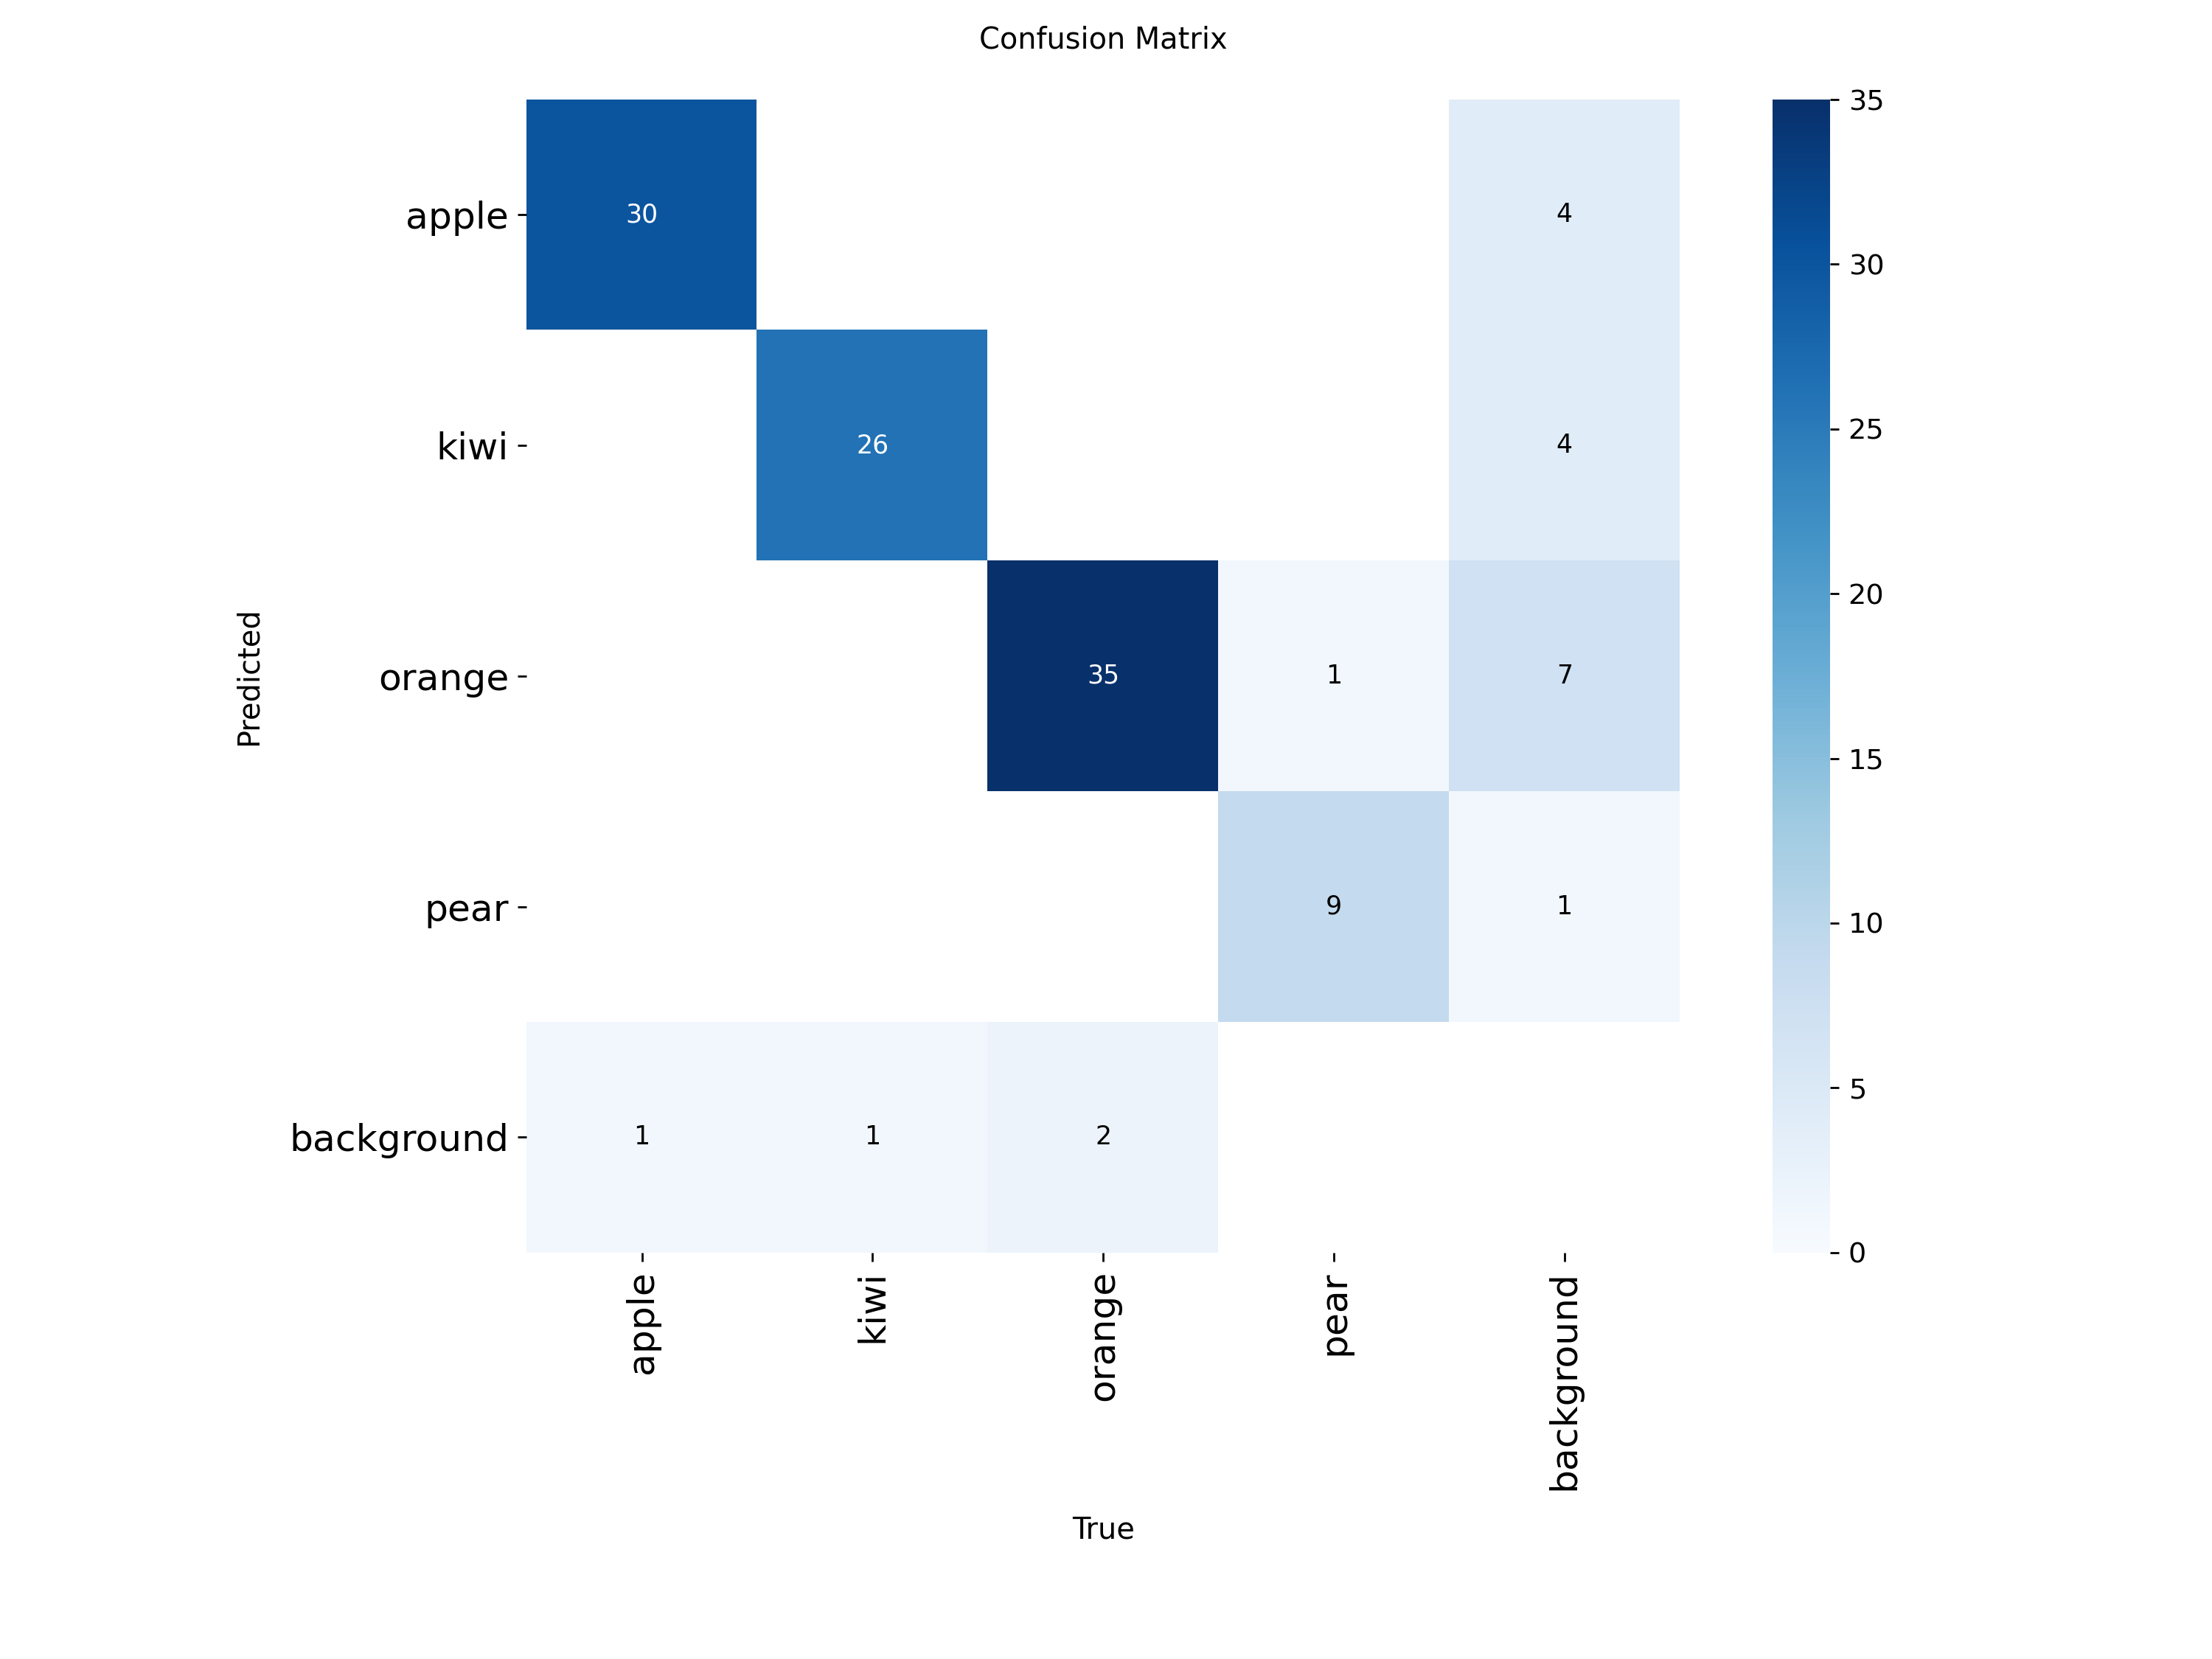

In [74]:
cm = '/content/runs/detect/train/confusion_matrix.png'
display(Image(filename = cm , width = 800 , height = 550))

In [61]:
Results = pd.read_csv('/content/runs/detect/train/results.csv')
Results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,13.7924,0.54670,2.32005,1.12619,0.72190,0.60392,0.65882,0.52659,0.57460,6.45523,1.23919,0.000175,0.000175,0.000175
1,2,22.4400,0.51048,1.37798,1.04794,0.65422,0.76870,0.76612,0.53498,0.77457,3.49575,1.45148,0.000358,0.000358,0.000358
2,3,36.7148,0.54002,1.11394,1.06818,0.50948,0.65669,0.69741,0.44568,1.04580,4.43813,2.13221,0.000536,0.000536,0.000536
3,4,46.0439,0.64128,1.18315,1.13505,0.24277,0.58017,0.34024,0.23613,1.21223,9.64586,2.47499,0.000710,0.000710,0.000710
4,5,54.8996,0.69636,1.36520,1.20125,0.10201,0.52973,0.10222,0.05743,1.92923,inf,5.35166,0.000879,0.000879,0.000879


In [20]:
bst = os.listdir('/content/runs/detect/train/weights')
print(bst)

['last.pt', 'best.pt']


In [23]:
# picking the best model up
best_model = '/content/runs/detect/train/weights/best.pt'
model = YOLO(best_model)
metrics = model.val(data='/content/fruit-2/data.yaml', split='test')
print(metrics)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1000.0±299.8 MB/s, size: 30.6 KB)


val: Scanning /content/fruit-2/test/labels... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 1773.14it/s]

val: New cache created: /content/fruit-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


                   all         36         82       0.91       0.83      0.896      0.787
                 apple         13         27       0.88      0.852      0.868      0.708
                  kiwi          5         13       0.98          1      0.995      0.968
                orange         14         30      0.837        0.8      0.879        0.8
                  pear          4         12      0.941      0.667      0.841      0.672
Speed: 7.3ms preprocess, 30.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79bd4c7f8b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    

image :


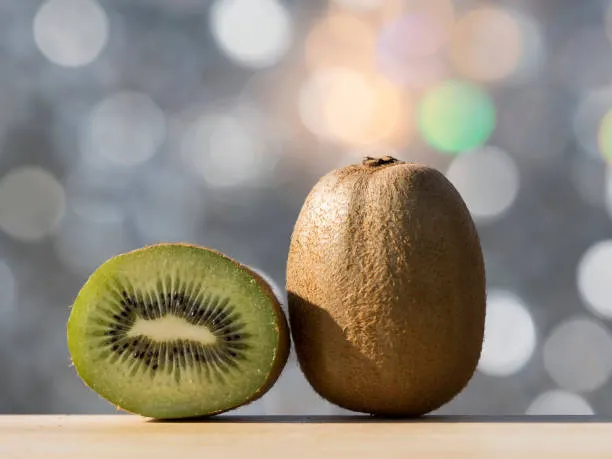


image 1/1 /content/kiwi.png: 480x640 3 apples, 3 kiwis, 28.1ms
Speed: 15.6ms preprocess, 28.1ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

results : 


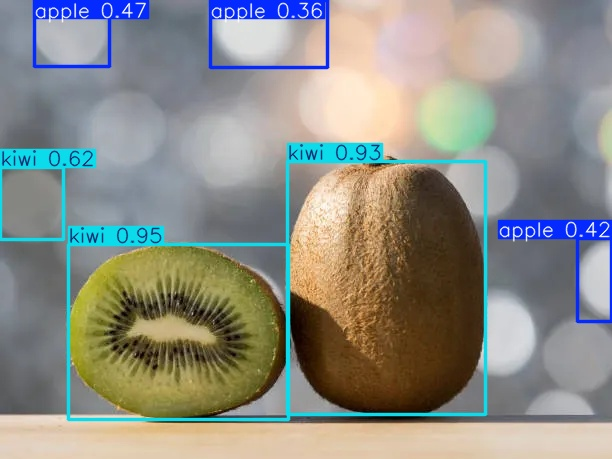

                          coord    conf  objects
0   [68.1, 244.1, 288.5, 419.3]  [0.9%]   [kiwi]
1  [287.5, 161.2, 485.8, 414.8]  [0.9%]   [kiwi]
2     [0.3, 167.9, 63.9, 239.8]  [0.6%]   [kiwi]
3      [34.4, 0.5, 109.3, 66.8]  [0.5%]  [apple]
4  [577.7, 239.0, 611.6, 321.1]  [0.4%]  [apple]
5     [210.1, 0.3, 327.9, 67.5]  [0.4%]  [apple]


In [32]:
# converting the image to png because that display function doesn't support webp extention
imgpath = '/content/kiwi.webp'
converted_path = '/content/kiwi.png'
img = PILImage.open(imgpath).convert("RGB")
img.save(converted_path, "PNG")
print("image :")
display(Image(filename=converted_path))

results = model.predict(source = converted_path , save=True)
print()
print("results : ")
tested_img = '/content/runs/detect/predict/kiwi.jpg'
display(Image(filename = tested_img))
data = []
result = results[0]
for box in result.boxes:
  xyxy = box.xyxy[0].tolist()
  conf = float(box.conf[0])
  clss = int(box.cls[0])
  label = result.names[clss]
  data.append({
      'coord' : [f"{i:.1f}" for i in xyxy] ,
      'conf' : [f"{conf:.1f}%"] ,
      "objects": [label]
  }
  )
data = pd.DataFrame(data)
print(data)

In [55]:
VideoTest = '/content/videofruits.mp4'
result2 = model.predict(source=VideoTest, save=True)

In [57]:
print(os.listdir('/content/runs/detect/predict2'))

['videofruits.avi']
